In [ ]:
# "I (We) certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I (we) did not receive any external help, coaching or contributions during the production of this work."

In [9]:
!pip install gym

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym import spaces

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

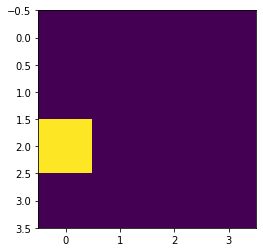

<IPython.core.display.Javascript object>

In [6]:
from google.colab import widgets
import time

output_grid = widgets.Grid(1, 1)
for _ in range(5):
  grid = np.zeros((4, 4))
  grid[np.random.randint(4), np.random.randint(4)] = 1
  with output_grid.output_to(0, 0):
    output_grid.clear_cell()
    plt.imshow(grid)
  time.sleep(1)

In [11]:
grid = np.zeros((4, 4))
print(grid)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [12]:
pos1 = [3, 0]
pos2 = [0, 3]


grid[tuple(pos1)] = 1
grid[tuple(pos2)] = 0.5



print(grid)

[[0.  0.  0.  0.5]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [1.  0.  0.  0. ]]


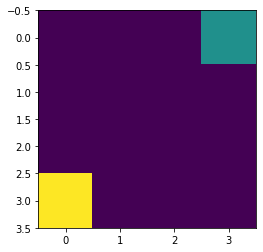

In [13]:
plt.imshow(grid)

In [14]:
class GridEnvironment(gym.Env):
  metadata = { 'render.modes': []}

  def __init__(self):
    self.observation_space = spaces.Discrete(16)
    self.action_space = spaces.Discrete(4)
    self.max_timesteps = 10

  def reset(self):
    self.timestep = 0
    self.agent_pos = [3, 0]
    self.goal_pos = [0, 3]
    self.state = np.zeros((4, 4)).astype('int')
    self.state[tuple(self.agent_pos)] = 1
    self.state[tuple(self.goal_pos)] = 0.5
    observation = self.state.flatten()
    return observation

  def step(self, action):
    self.state = np.random.choice(self.observation_space.n)
    if action == 0:
      self.agent_pos[0] += 1
    if action == 1:
      self.agent_pos[0] -= 1
    if action == 2:
      self.agent_pos[1] += 1
    if action == 3:
      self.agent_pos[1] -= 1
    
    self.agent_pos = np.clip(self.agent_pos, 0, 2)
    self.state = np.zeros((4,4))
    self.state[tuple(self.agent_pos)] = 1
    self.state[tuple(self.goal_pos)] = 0.5
    observation = self.state.flatten()

    reward = 0
    if (self.agent_pos == self.goal_pos).all():
      reward = 1
    elif (self.agent_pos == (0,2)).all():
      reward = 4
    elif (self.agent_pos == (1,2)).all():
      reward = 2
    elif (self.agent_pos == (2,3)).all():
      reward = -4
    elif (self.agent_pos == (2,0)).all():
      reward = -2

    self.timestep += 1
    done = True if self.timestep >= self.max_timesteps else False
    info = {}

    return observation, reward, done, info

  def render(self):
    plt.imshow(self.state)

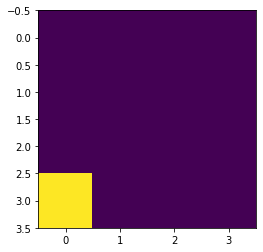

In [15]:
env = GridEnvironment()
obs = env.reset()
env.render()

In [16]:
class RandomAgent:
  def __init__(self, env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space

  def step(self, observation):
    n=10
    return np.random.choice(self.action_space.n)

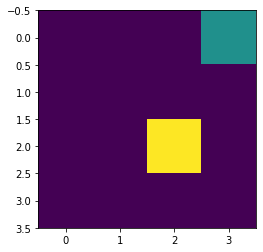

In [17]:
#initial Hyperparameters
epsilon = 0.9
min_epsilon = 0.1
max_epsilon = 1.0
decay_rate = 0.01
total_episodes = 100
max_timesteps = 10
epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * total_episodes)
Q = np.zeros((env.observation_space.n, env.action_space.n))
    
def action_step(state, epsilon, Q):
	state = state.astype('int')
	action=0
	if np.random.uniform(0, 1) < epsilon:
		action = env.action_space.sample()
	else:
		action = np.argmax(Q[state,action])	
	return action
gamma=0.9
lr_rate=1e-4
def sarsa(state, state2, reward, action, action2):
	env.render()
	hor=[]
	epsilon.astype('int')
	state2 = state2.astype('int')
	state = state.astype('int')
	reward_completion = Q[state2, action2]
	average_time = reward + gamma * Q[state2, action2]
	Q[state, action] = Q[state, action] + reward + lr_rate * (average_time - reward_completion)
  

rewards=0

for total_episodes in range(total_episodes):
	t = 0
	state = env.reset()
	action = action_step(state, epsilon, Q)
    
	while t < max_timesteps:
		env.render()

		state2, reward, done, info = env.step(action)

		action2 = action_step(state2, epsilon, Q)

		sarsa(state, state2, reward, action, action2)

		state = state2
		action = action2

		t += 1
		rewards+=1

		if done:
			break 
time.sleep(1)

[[-3.17843259e+03 -1.12575372e+01  7.92492821e-01 -1.27058460e+02]
 [-3.17843259e+03 -1.12575372e+01  7.92492821e-01 -1.27058460e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e

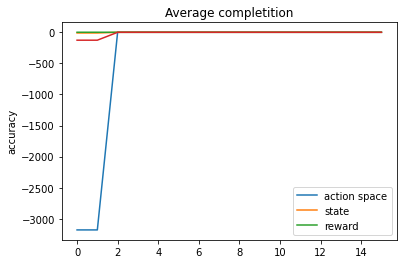

2000


In [ ]:
print(Q)
plt.plot(Q)
plt.title('Average completition')
plt.ylabel('accuracy')
plt.legend(['action space', 'state','reward'], loc='lower right')
plt.show()

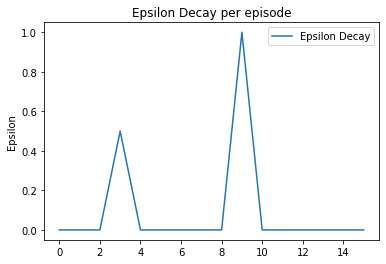

In [ ]:
plt.plot(state2)
plt.ylabel('Epsilon')
plt.title('Epsilon Decay per episode')
plt.legend(['Epsilon Decay'], loc='upper right')
plt.show()

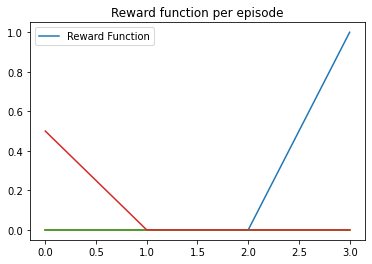

In [ ]:
plt.plot(grid)
plt.title('Reward function per episode')
plt.legend(['Reward Function'], loc='upper left')
plt.show()

## Parameter Changes

### Epsilon decay rate = 0.02

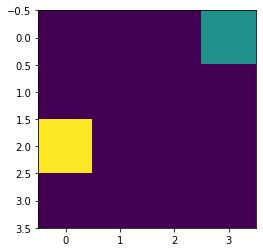

In [19]:
#Tuned Hyperparameters
epsilon = 0.8
min_epsilon = 0.1
max_epsilon = 1.0
decay_rate = 0.02
total_episodes = 100
max_timesteps = 10
epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * total_episodes)
Q = np.zeros((env.observation_space.n, env.action_space.n))
    
def action_step(state, epsilon, Q):
	state = state.astype('int')
	action=0
	if np.random.uniform(0, 1) < epsilon:
		action = env.action_space.sample()
	else:
		action = np.argmax(Q[state,action])
	return action
gamma=0.9
lr_rate=1e-4
def sarsa(state, state2, reward, action, action2):
	env.render()
	hor=[]
	epsilon.astype('int')
	state2 = state2.astype('int')
	state = state.astype('int')
	reward_completion = Q[state2, action2]
	average_time = reward + gamma * Q[state2, action2]
	Q[state, action] = Q[state, action] + reward + lr_rate * (average_time - reward_completion)
  

rewards=0

for total_episodes in range(total_episodes):
	t = 0
	state = env.reset()
	action = action_step(state, epsilon, Q)
    
	while t < max_timesteps:
		env.render()

		state2, reward, done, info = env.step(action)

		action2 = action_step(state2, epsilon, Q)

		sarsa(state, state2, reward, action, action2)

		state = state2
		action = action2

		t += 1
		rewards+=1

		if done:
			break 
time.sleep(1)

[[-1.35530354e+03 -1.73413735e+00  3.22022263e-01 -9.17080711e+01]
 [-1.35530354e+03 -1.73413735e+00  3.22022263e-01 -9.17080711e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e

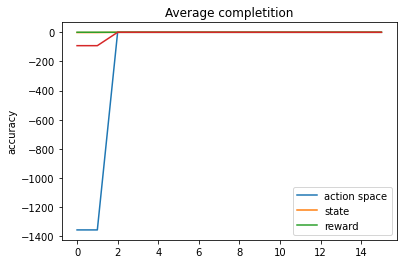

In [ ]:
print(Q)
plt.plot(Q)
plt.title('Average completition')
plt.ylabel('accuracy')
plt.legend(['action space', 'state','reward'], loc='lower right')
plt.show()

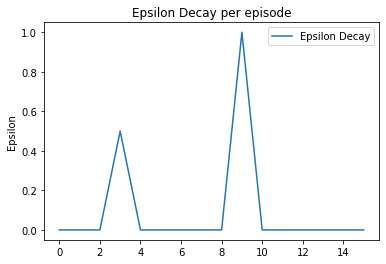

In [ ]:
plt.plot(state2)
plt.ylabel('Epsilon')
plt.title('Epsilon Decay per episode')
plt.legend(['Epsilon Decay'], loc='upper right')
plt.show()

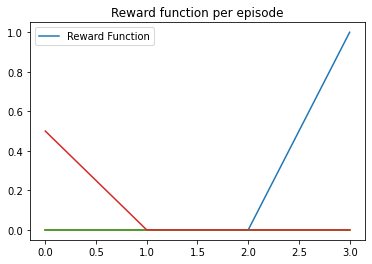

In [ ]:
plt.plot(grid)
plt.title('Reward function per episode')
plt.legend(['Reward Function'], loc='upper left')
plt.show()

### Epsilon decay rate = 0.03

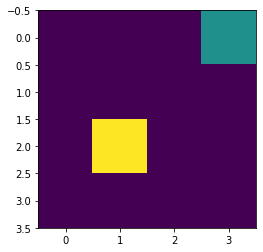

In [ ]:
#Tuned Hyperparameters
epsilon = 0.8
min_epsilon = 0.1
max_epsilon = 1.0
decay_rate = 0.03
total_episodes = 100
max_timesteps = 10
epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * total_episodes)
Q = np.zeros((env.observation_space.n, env.action_space.n))
    
def action_step(state, epsilon, Q):
	state = state.astype('int')
	action=0
	if np.random.uniform(0, 1) < epsilon:
		action = env.action_space.sample()
	else:
		action = np.argmax(Q[state,action])
	return action
gamma=0.9
lr_rate=1e-4
def sarsa(state, state2, reward, action, action2):
	env.render()
	hor=[]
	epsilon.astype('int')
	state2 = state2.astype('int')
	state = state.astype('int')
	reward_completion = Q[state2, action2]
	average_time = reward + gamma * Q[state2, action2]
	Q[state, action] = Q[state, action] + reward + lr_rate * (average_time - reward_completion)
  

rewards=0

for total_episodes in range(total_episodes):
	t = 0
	state = env.reset()
	action = action_step(state, epsilon, Q)
    
	while t < max_timesteps:
		env.render()

		state2, reward, done, info = env.step(action)

		action2 = action_step(state2, epsilon, Q)

		sarsa(state, state2, reward, action, action2)

		state = state2
		action = action2

		t += 1
		rewards+=1

		if done:
			break 
time.sleep(1)

[[-1.35530354e+03 -1.73413735e+00  3.22022263e-01 -9.17080711e+01]
 [-1.35530354e+03 -1.73413735e+00  3.22022263e-01 -9.17080711e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e

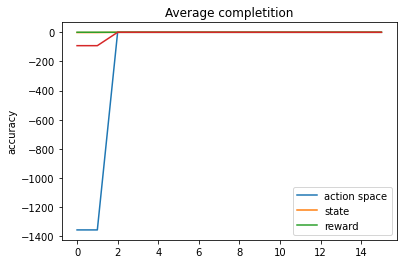

In [ ]:
print(Q)
plt.plot(Q)
plt.title('Average completition')
plt.ylabel('accuracy')
plt.legend(['action space', 'state','reward'], loc='lower right')
plt.show()

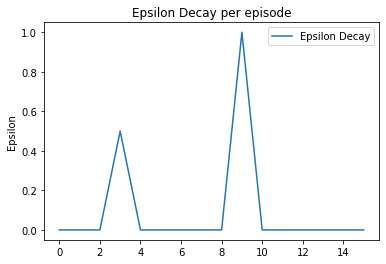

In [ ]:
plt.plot(state2)
plt.ylabel('Epsilon')
plt.title('Epsilon Decay per episode')
plt.legend(['Epsilon Decay'], loc='upper right')
plt.show()

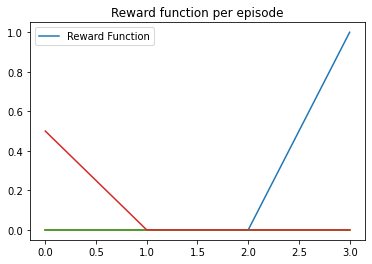

In [ ]:
plt.plot(grid)
plt.title('Reward function per episode')
plt.legend(['Reward Function'], loc='upper left')
plt.show()

###Epsilon decay rate = 0.04

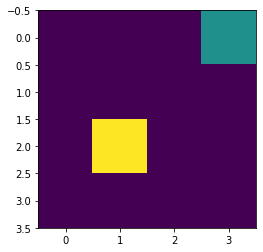

In [ ]:
#Tuned Hyperparameters
epsilon = 0.8
min_epsilon = 0.1
max_epsilon = 1.0
decay_rate = 0.04
total_episodes = 100
max_timesteps = 10
epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * total_episodes)
Q = np.zeros((env.observation_space.n, env.action_space.n))
    
def action_step(state, epsilon, Q):
	state = state.astype('int')
	action=0
	if np.random.uniform(0, 1) < epsilon:
		action = env.action_space.sample()
	else:
		action = np.argmax(Q[state,action])
	return action
gamma=0.9
lr_rate=1e-4
def sarsa(state, state2, reward, action, action2):
	env.render()
	hor=[]
	epsilon.astype('int')
	state2 = state2.astype('int')
	state = state.astype('int')
	reward_completion = Q[state2, action2]
	average_time = reward + gamma * Q[state2, action2]
	Q[state, action] = Q[state, action] + reward + lr_rate * (average_time - reward_completion)
  

rewards=0

for total_episodes in range(total_episodes):
	t = 0
	state = env.reset()
	action = action_step(state, epsilon, Q)
    
	while t < max_timesteps:
		env.render()

		state2, reward, done, info = env.step(action)

		action2 = action_step(state2, epsilon, Q)

		sarsa(state, state2, reward, action, action2)

		state = state2
		action = action2

		t += 1
		rewards+=1

		if done:
			break 
time.sleep(1)

[[-1.35530354e+03 -1.73413735e+00  3.22022263e-01 -9.17080711e+01]
 [-1.35530354e+03 -1.73413735e+00  3.22022263e-01 -9.17080711e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e

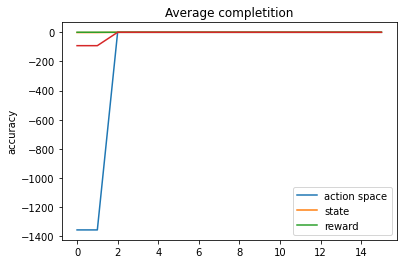

In [ ]:
print(Q)
plt.plot(Q)
plt.title('Average completition')
plt.ylabel('accuracy')
plt.legend(['action space', 'state','reward'], loc='lower right')
plt.show()

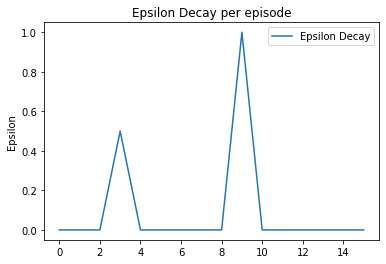

In [ ]:
plt.plot(state2)
plt.ylabel('Epsilon')
plt.title('Epsilon Decay per episode')
plt.legend(['Epsilon Decay'], loc='upper right')
plt.show()

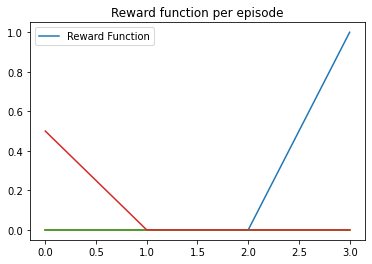

In [ ]:
plt.plot(grid)
plt.title('Reward function per episode')
plt.legend(['Reward Function'], loc='upper left')
plt.show()

### Total episodes

Total episodes = 200

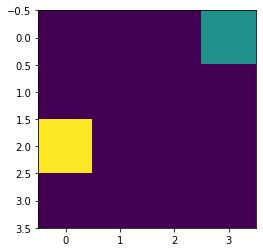

In [ ]:
#Tuned Hyperparameters
epsilon = 0.8
min_epsilon = 0.1
max_epsilon = 1.0
decay_rate = 0.02
total_episodes = 50
max_timesteps = 10
epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * total_episodes)
Q = np.zeros((env.observation_space.n, env.action_space.n))
    
def action_step(state, epsilon, Q):
	state = state.astype('int')
	action=0
	if np.random.uniform(0, 1) < epsilon:
		action = env.action_space.sample()
	else:
		action = np.argmax(Q[state,action])
	return action
gamma=0.9
lr_rate=1e-4
def sarsa(state, state2, reward, action, action2):
	env.render()
	hor=[]
	epsilon.astype('int')
	state2 = state2.astype('int')
	state = state.astype('int')
	reward_completion = Q[state2, action2]
	average_time = reward + gamma * Q[state2, action2]
	Q[state, action] = Q[state, action] + reward + lr_rate * (average_time - reward_completion)
  

rewards=0

for total_episodes in range(total_episodes):
	t = 0
	state = env.reset()
	action = action_step(state, epsilon, Q)
    
	while t < max_timesteps:
		env.render()

		state2, reward, done, info = env.step(action)

		action2 = action_step(state2, epsilon, Q)

		sarsa(state, state2, reward, action, action2)

		state = state2
		action = action2

		t += 1
		rewards+=1

		if done:
			break 
time.sleep(1)

[[-3.17843259e+03 -1.12575372e+01  7.92492821e-01 -1.27058460e+02]
 [-3.17843259e+03 -1.12575372e+01  7.92492821e-01 -1.27058460e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e

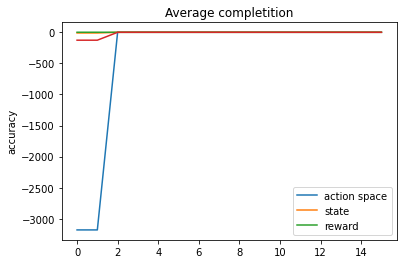

In [ ]:
print(Q)
plt.plot(Q)
plt.title('Average completition')
plt.ylabel('accuracy')
plt.legend(['action space', 'state','reward'], loc='lower right')
plt.show()

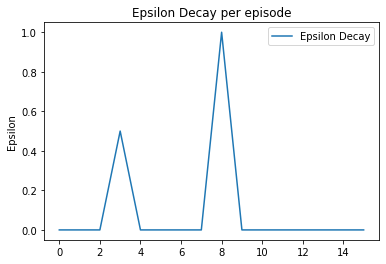

In [ ]:
plt.plot(state2)
plt.ylabel('Epsilon')
plt.title('Epsilon Decay per episode')
plt.legend(['Epsilon Decay'], loc='upper right')
plt.show()

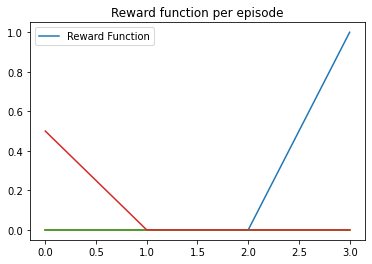

In [ ]:
plt.plot(grid)
plt.title('Reward function per episode')
plt.legend(['Reward Function'], loc='upper left')
plt.show()

### Total episodes = 50

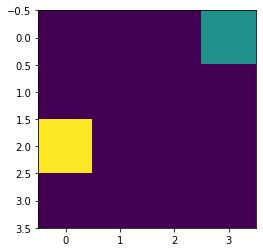

In [ ]:
#Tuned Hyperparameters
epsilon = 0.8
min_epsilon = 0.1
max_epsilon = 1.0
decay_rate = 0.02
total_episodes = 50
max_timesteps = 10
epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * total_episodes)
Q = np.zeros((env.observation_space.n, env.action_space.n))
    
def action_step(state, epsilon, Q):
	state = state.astype('int')
	action=0
	if np.random.uniform(0, 1) < epsilon:
		action = env.action_space.sample()
	else:
		action = np.argmax(Q[state,action])
	return action
gamma=0.9
lr_rate=1e-4
def sarsa(state, state2, reward, action, action2):
	env.render()
	hor=[]
	epsilon.astype('int')
	state2 = state2.astype('int')
	state = state.astype('int')
	reward_completion = Q[state2, action2]
	average_time = reward + gamma * Q[state2, action2]
	Q[state, action] = Q[state, action] + reward + lr_rate * (average_time - reward_completion)
  

rewards=0

for total_episodes in range(total_episodes):
	t = 0
	state = env.reset()
	action = action_step(state, epsilon, Q)
    
	while t < max_timesteps:
		env.render()

		state2, reward, done, info = env.step(action)

		action2 = action_step(state2, epsilon, Q)

		sarsa(state, state2, reward, action, action2)

		state = state2
		action = action2

		t += 1
		rewards+=1

		if done:
			break 
time.sleep(1)

[[-4.93437241e+03 -8.10813855e+00  1.50642018e+00 -1.56493439e+02]
 [-4.93437241e+03 -8.10813855e+00  1.50642018e+00 -1.56493439e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e

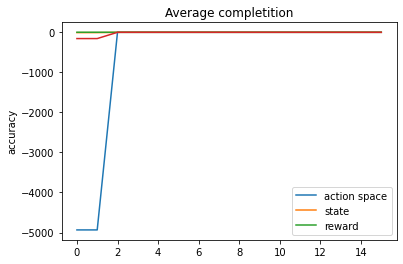

In [ ]:
print(Q)
plt.plot(Q)
plt.title('Average completition')
plt.ylabel('accuracy')
plt.legend(['action space', 'state','reward'], loc='lower right')
plt.show()

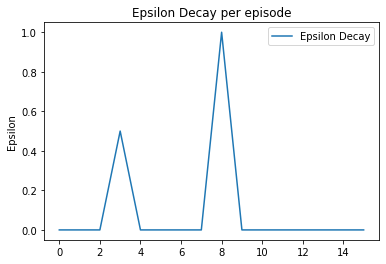

In [ ]:
plt.plot(state2)
plt.ylabel('Epsilon')
plt.title('Epsilon Decay per episode')
plt.legend(['Epsilon Decay'], loc='upper right')
plt.show()

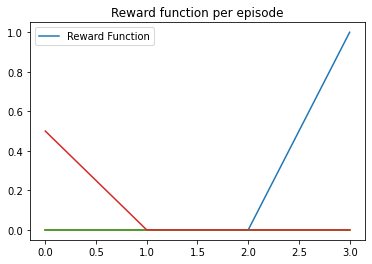

In [ ]:
plt.plot(grid)
plt.title('Reward function per episode')
plt.legend(['Reward Function'], loc='upper left')
plt.show()

###Total episodes = 300

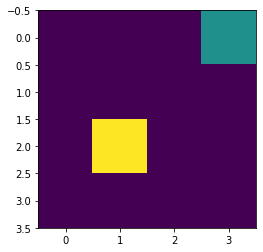

In [ ]:
#Tuned Hyperparameters
epsilon = 0.8
min_epsilon = 0.1
max_epsilon = 1.0
decay_rate = 0.02
total_episodes = 300
max_timesteps = 10
epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * total_episodes)
Q = np.zeros((env.observation_space.n, env.action_space.n))
    
def action_step(state, epsilon, Q):
	state = state.astype('int')
	action=0
	if np.random.uniform(0, 1) < epsilon:
		action = env.action_space.sample()
	else:
		action = np.argmax(Q[state,action])
	return action
gamma=0.9
lr_rate=1e-4
def sarsa(state, state2, reward, action, action2):
	env.render()
	hor=[]
	epsilon.astype('int')
	state2 = state2.astype('int')
	state = state.astype('int')
	reward_completion = Q[state2, action2]
	average_time = reward + gamma * Q[state2, action2]
	Q[state, action] = Q[state, action] + reward + lr_rate * (average_time - reward_completion)
  

rewards=0

for total_episodes in range(total_episodes):
	t = 0
	state = env.reset()
	action = action_step(state, epsilon, Q)
    
	while t < max_timesteps:
		env.render()

		state2, reward, done, info = env.step(action)

		action2 = action_step(state2, epsilon, Q)

		sarsa(state, state2, reward, action, action2)

		state = state2
		action = action2

		t += 1
		rewards+=1

		if done:
			break 
time.sleep(1)

[[-1.35530354e+03 -1.73413735e+00  3.22022263e-01 -9.17080711e+01]
 [-1.35530354e+03 -1.73413735e+00  3.22022263e-01 -9.17080711e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e

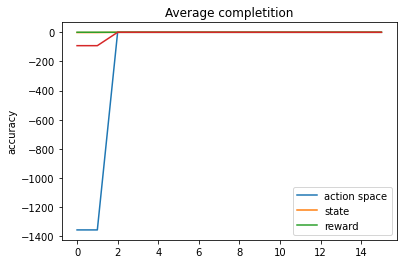

In [ ]:
print(Q)
plt.plot(Q)
plt.title('Average completition')
plt.ylabel('accuracy')
plt.legend(['action space', 'state','reward'], loc='lower right')
plt.show()

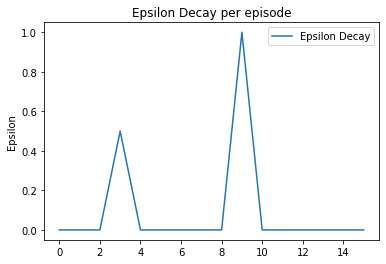

In [ ]:
plt.plot(state2)
plt.ylabel('Epsilon')
plt.title('Epsilon Decay per episode')
plt.legend(['Epsilon Decay'], loc='upper right')
plt.show()

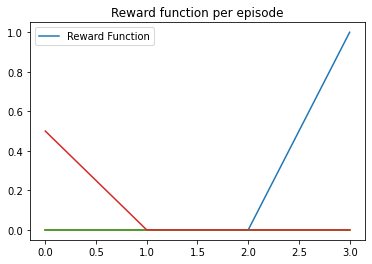

In [ ]:
plt.plot(grid)
plt.title('Reward function per episode')
plt.legend(['Reward Function'], loc='upper left')
plt.show()